# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Processing the data
url = "http://api.openweathermap.org/data/2.5/forecast?"
units = "imperial"
query_url = f"{url}appid={api_key}&units={units}&q="

count = 1      
SET = 1

# Lists for holding values for the data
cloudiness = []
humidity = []
lat = []
lon = []
temp = []
wind_speed = []
country = []
date = []
max_temp = []
city_list = []


# Printing out the results of each city being processed from the successive API calls
print("Beginning Data Retrieval")
print("-----------------------------")
      



for city in cities:  

    try:   
        response = requests.get(query_url + city).json()  
        
        print(f"Processing Record {index} of Set {set_num} | " + city)

        
        cloudiness.append(response["list"][0]["clouds"]["all"])
        humidity.append(response["list"][0]["main"]["humidity"])               
        lat.append(response["city"]["coord"]["lat"])
        lon.append(response["city"]["coord"]["lon"])
        temp.append(response["list"][0]["main"]["temp"])
        wind_speed.append(response["list"][0]["wind"]["speed"])
        country.append(response["city"]["country"])
        date.append(response["list"][0]["dt"])
        max_temp.append(response["list"][0]["main"]["temp_max"])
        city_list.append(response["city"]["name"])
        index+=1
        
        if(index > 50):
            set_num+=1
            index = 0

        
# Print this output if city is not found
    except(KeyError, ValueError):
        print("City not found. Skipping...")

    

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | shimoda
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | ixtapa
Processing Record 5 of Set 1 | mar del plata
Processing Record 6 of Set 1 | katobu
Processing Record 7 of Set 1 | geraldton
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 9 of Set 1 | yulara
Processing Record 10 of Set 1 | puerto ayora
Processing Record 11 of Set 1 | hobart
Processing Record 12 of Set 1 | nokaneng
Processing Record 13 of Set 1 | marcona
City not found. Skipping...
Processing Record 13 of Set 1 | labuan
Processing Record 14 of Set 1 | bada
Processing Record 15 of Set 1 | malappuram
Processing Record 16 of Set 1 | juneau
Processing Record 17 of Set 1 | zyryanka
Processing Record 18 of Set 1 | kodiak
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | norman wells
P

Processing Record 16 of Set 4 | mayo
Processing Record 17 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 17 of Set 4 | saint-michel-des-saints
Processing Record 18 of Set 4 | xichang
Processing Record 19 of Set 4 | axim
Processing Record 20 of Set 4 | bolungarvik
City not found. Skipping...
Processing Record 20 of Set 4 | bogande
Processing Record 21 of Set 4 | kabinda
Processing Record 22 of Set 4 | hualmay
Processing Record 23 of Set 4 | bilma
Processing Record 24 of Set 4 | tartus
City not found. Skipping...
Processing Record 24 of Set 4 | cocobeach
Processing Record 25 of Set 4 | vestmannaeyjar
Processing Record 26 of Set 4 | north myrtle beach
Processing Record 27 of Set 4 | sinnamary
Processing Record 28 of Set 4 | maumere
Processing Record 29 of Set 4 | port hueneme
Processing Record 30 of Set 4 | cidreira
Processing Record 31 of Set 4 | sisophon
Processing Record 32 of Set 4 | college
Processing Record 33 of Set 4 | dunedin
Processing Record 34 of Set 4 | ata

Processing Record 30 of Set 7 | hambantota
Processing Record 31 of Set 7 | hofn
Processing Record 32 of Set 7 | quchan
Processing Record 33 of Set 7 | rungata
City not found. Skipping...
Processing Record 33 of Set 7 | alofi
Processing Record 34 of Set 7 | ogaminana
Processing Record 35 of Set 7 | roma
Processing Record 36 of Set 7 | lavrentiya
Processing Record 37 of Set 7 | carquefou
Processing Record 38 of Set 7 | darnah
Processing Record 39 of Set 7 | peniche
Processing Record 40 of Set 7 | fianarantsoa
Processing Record 41 of Set 7 | myanaung
Processing Record 42 of Set 7 | plettenberg bay
Processing Record 43 of Set 7 | ponta delgada
Processing Record 44 of Set 7 | bandarbeyla
Processing Record 45 of Set 7 | antsohihy
Processing Record 46 of Set 7 | half moon bay
Processing Record 47 of Set 7 | beaverlodge
Processing Record 48 of Set 7 | erzin
Processing Record 49 of Set 7 | minab
Processing Record 50 of Set 7 | aosta
Processing Record 0 of Set 8 | itaituba
Processing Record 1 of

Processing Record 42 of Set 10 | angoram
Processing Record 43 of Set 10 | trairi
Processing Record 44 of Set 10 | shingu
Processing Record 45 of Set 10 | porbandar
Processing Record 46 of Set 10 | abha
Processing Record 47 of Set 10 | gravesend
Processing Record 48 of Set 10 | artyk
City not found. Skipping...
Processing Record 48 of Set 10 | puerto asis
Processing Record 49 of Set 10 | la libertad
Processing Record 50 of Set 10 | odweyne
City not found. Skipping...
Processing Record 50 of Set 10 | port macquarie
Processing Record 0 of Set 11 | galveston
Processing Record 1 of Set 11 | satitoa
City not found. Skipping...
Processing Record 1 of Set 11 | shintomi
Processing Record 2 of Set 11 | pechora
Processing Record 3 of Set 11 | general pico
Processing Record 4 of Set 11 | kawalu
Processing Record 5 of Set 11 | ivanovka
Processing Record 6 of Set 11 | aksarka
Processing Record 7 of Set 11 | turkistan
City not found. Skipping...
Processing Record 7 of Set 11 | ndioum
Processing Recor

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
# Make the dataframe
city_data = pd.DataFrame({"City": city_list,
                      "Cloudiness": cloudiness, 
                      "Country": country, 
                      "Date": date, 
                      "Humidity": humidity,
                      "Lat": lat, 
                  "Lng": lon, 
                   "Max Temp": max_temp, 
                   "Wind Speed": wind_speed})


# Save city data to a csv file
city_data.to_csv("output_data/cities.csv", index=False)


# Display the dataframe
city_data.count()


City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

In [6]:
# Display the head of dataframe columns for the data
city_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Punta Arenas,64,CL,1553407200,92,-53.1627,-70.9081,51.12,11.88
1,Shimoda,0,JP,1553407200,100,34.7010,138.9287,55.18,5.61
2,Vaini,0,IN,1553407200,33,15.3360,74.4926,104.52,3.71
3,Ixtapa,0,MX,1553407200,81,20.7150,-105.2067,65.62,2.26
4,Mar del Plata,20,AR,1553407200,100,-46.4276,-67.5191,44.09,4.50


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

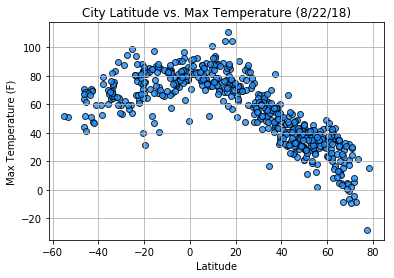

In [10]:
# Make the x and y coordinates
x1 = city_data["Lat"]
y1 = city_data["Max Temp"]


# Make the scatter plot data
plt.scatter(x1, y1, marker="o", facecolors="dodgerblue", edgecolor="black", alpha=0.80)


# Make titles for the graph, x-axis, and y-axis along with adding the grid
plt.title("City Latitude vs. Max Temperature (8/22/18)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)


# Save plotted figure as png file
plt.savefig("images/latitude_temp.png")


# Display the graph
plt.show()

#### Latitude vs. Humidity Plot

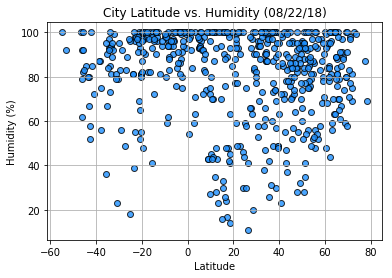

In [11]:
# Make the x and y coordinates
x2 = city_data["Lat"]
y2 = city_data["Humidity"]


# Make the scatter plot data
plt.scatter(x2, y2, marker="o", facecolors="dodgerblue", edgecolor="black", alpha=0.80)


# Make titles for the graph, x-axis, and y-axis along with adding the grid
plt.title("City Latitude vs. Humidity (08/22/18)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save plotted figure as png file
plt.savefig("images/latitude_humidity.png")


# Display the graph
plt.show()

#### Latitude vs. Cloudiness Plot

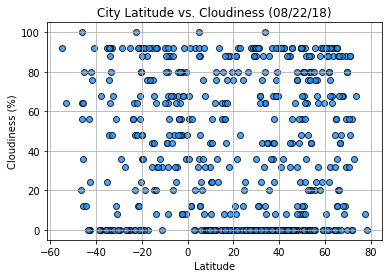

In [12]:
# Make the x and y coordinates
x3 = city_data["Lat"]
y3 = city_data["Cloudiness"]


# Make the scatter plot data
plt.scatter(x3, y3, marker="o", facecolors="dodgerblue", edgecolor="black", alpha=0.80)


# Make titles for the graph, x-axis, and y-axis along with adding the grid
plt.title("City Latitude vs. Cloudiness (08/22/18)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save plotted figure as png file
plt.savefig("images/latitude_cloudiness.png")


# Display the graph
plt.show()

#### Latitude vs. Wind Speed Plot

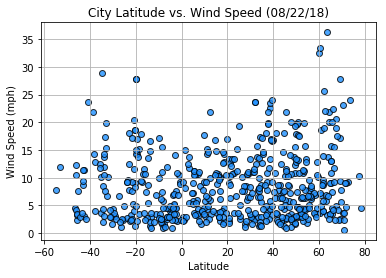

In [14]:
# Make the x and y coordinates
x4 = city_data["Lat"]
y4 = city_data["Wind Speed"]


# Make the scatter plot data
plt.scatter(x4, y4, marker="o", facecolors="dodgerblue", edgecolor="black", alpha=0.80)


# Make titles for the graph, x-axis, and y-axis along with adding the grid
plt.title("City Latitude vs. Wind Speed (08/22/18)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)


# Save plotted figure as png file
plt.savefig("images/latitude_wind_speed.png")


# Display the graph
plt.show()